In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

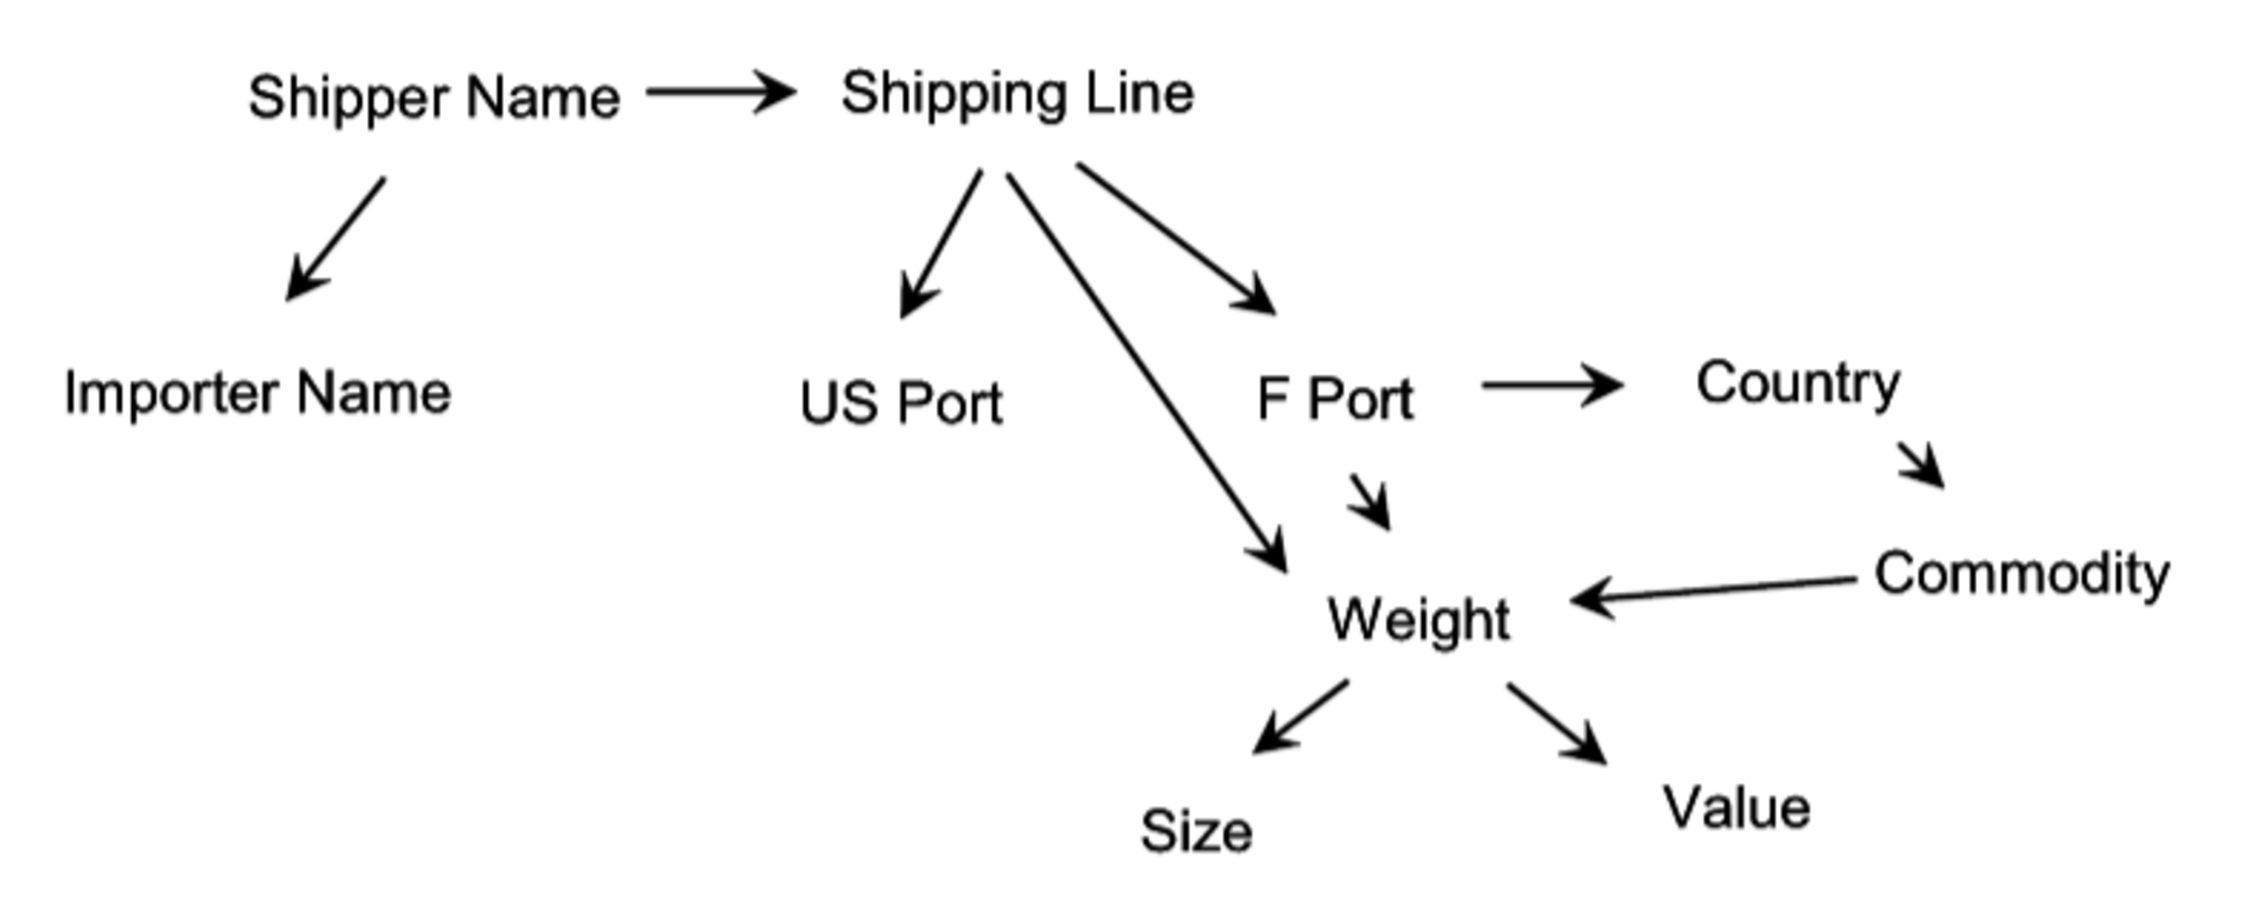

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)? Dependent

CI (Shipper Name, Value | Shipping Line)?  Independent

CI (Foreign Port, Commodity | Country)?  Independent

CI (Foreign Port, Commodity | County, Weight)?  Dependent

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (80%), ASCO (20%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (20%), Los Angeles (80%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (30%), Medium (20%), Heavy (50%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (60%), Heavy (30%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (15%), Medium (15%), Heavy (70%)

Which of the following packages is most anomalous?

a) A light package shipped from Vancouver to Seattle by ASCO

b) A medium package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

(Your answers here, including all calculations)

Let S,F,U,W stand for Shipping Line,Foreign Port,US Port,Weight respectively.
a) P(S=ASCO, F=Vancouver, U=Seattle, W=Light) = P(S=ASCO)P(F=Vancouver|S=ASCO)P(U=Seattle|S=ASCO)P(W=Light|S=ASCO, F=Vancouver) = 0.2 * 1 * 1 * 0.15 = 0.03

b) P(S=CSCO, F=Vancouver, U=Seattle, W=Medium) = P(S=CSCO)P(F=Vancouver|S=CSCO)P(U=Seattle|S=CSCO)P(W=Medium|S=CSCO, F=Vancouver) = 0.8 * 0.6 * 0.2 * 0.2 = 0.0192

c) P(S=CSCO, F=Yokohama, U=Los Angeles, W=Heavy) = P(S=CSCO)P(F=Yokohama|S=CSCO)P(U=Los Angeles|S=CSCO)P(W=Heavy|S=CSCO, F=Yokohama) = 0.8 * 0.4 * 0.8 * 0.3 = 0.0768

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,0,0,0,1,0,1
2,1,1,0,1,1,1
3,1,0,0,1,1,1
4,2,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [4]:
# your answers here
import pgmpy
from pgmpy.models import BayesianModel
from sklearn.model_selection import train_test_split
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
import copy

data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
# a)
est = HillClimbSearch(train, scoring_method=BicScore(train))
model = est.estimate()
# b)
theBayesianModel = BayesianModel()
for node in model.nodes:
    theBayesianModel.add_node(node)
for edge in model.edges:
    theBayesianModel.add_edge(edge[0], edge[1])
estimator = BayesianEstimator(theBayesianModel, train)
cpd_A = estimator.estimate_cpd('A', prior_type="K2")
print(cpd_A)
cpd_B = estimator.estimate_cpd('B', prior_type="K2")
print(cpd_B)
cpd_C = estimator.estimate_cpd('C', prior_type="K2")
print(cpd_C)
cpd_D = estimator.estimate_cpd('D', prior_type="K2")
print(cpd_D)
cpd_E = estimator.estimate_cpd('E', prior_type="K2")
print(cpd_E)
cpd_F = estimator.estimate_cpd('F', prior_type="K2")
print(cpd_F)
theBayesianModel.add_cpds(cpd_A, cpd_B, cpd_C, cpd_D, cpd_E, cpd_F)
print(" ")

# c)
# Predict A values for test dataset
testCopy = copy.deepcopy(test)
test.drop('A', axis=1, inplace=True)
predict_df = theBayesianModel.predict(test)

# Calculate accuracy
testData = testCopy['A'].values
predictData = predict_df['A'].values
trueNumber = 0
for index in range(len(testData)):
    if testData[index] == predictData[index]:
        trueNumber += 1
print("Prediction accuracy:", trueNumber/len(testData))


  0%|                                                                           | 7/1000000 [00:00<10:53:39, 25.50it/s]


+------+-----------+
| A(0) | 0.321785  |
+------+-----------+
| A(1) | 0.363757  |
+------+-----------+
| A(2) | 0.252165  |
+------+-----------+
| A(3) | 0.0622918 |
+------+-----------+
+------+-----------------------+--------------------+---------------------+--------------------+--------------------+-----------------------+-----------------------+------+
| A    | A(0)                  | A(0)               | A(1)                | A(1)               | A(2)               | A(2)                  | A(3)                  | A(3) |
+------+-----------------------+--------------------+---------------------+--------------------+--------------------+-----------------------+-----------------------+------+
| D    | D(0)                  | D(1)               | D(0)                | D(1)               | D(0)               | D(1)                  | D(0)                  | D(1) |
+------+-----------------------+--------------------+---------------------+--------------------+--------------------+--

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:17<00:00,  1.82it/s]


Prediction accuracy: 0.5645


D:\python\lib\site-packages\pgmpy\models\BayesianModel.py:592: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


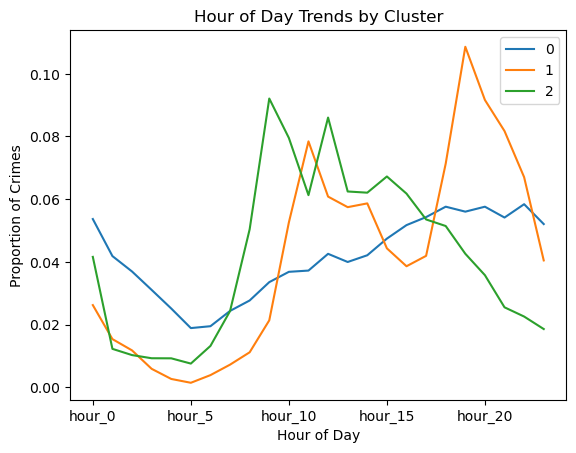

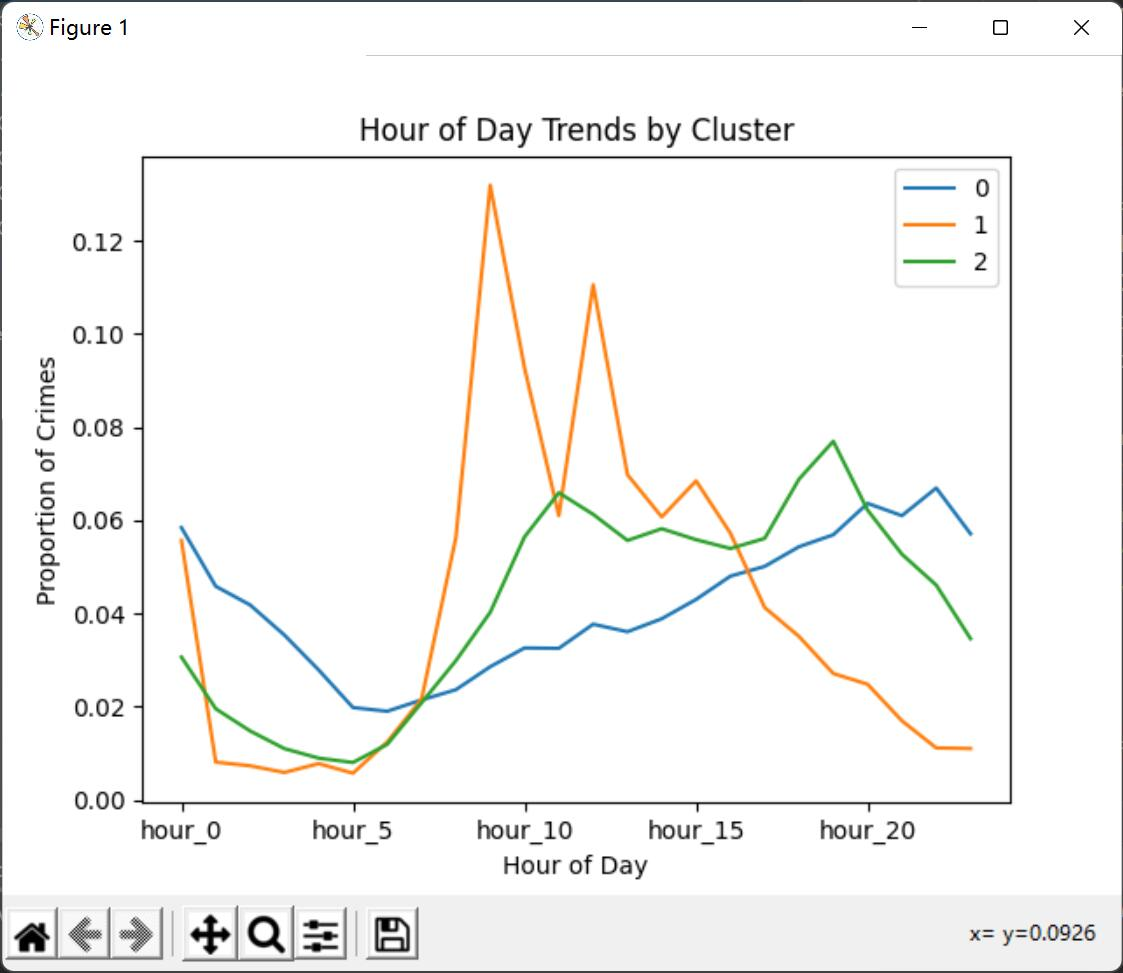

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
data=pd.read_csv("HW3Q3_1.csv")
data.head()
hour_features = [f for f in data.columns if f.startswith('hour_')]
X_hour = data[hour_features].values
kmeans_hour = KMeans(n_clusters=3, random_state=0)
kmeans_hour.fit(X_hour)
labels_hour = kmeans_hour.labels_
centroids_hour = kmeans_hour.cluster_centers_
df_hour = pd.DataFrame(centroids_hour, columns=hour_features)
df_hour.T.plot(kind='line')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Crimes')
plt.title('Hour of Day Trends by Cluster')
plt.show()
Image('Q3_a.jpg')

b) Cluster 1: This cluster has a nadir at 6 o'clock, and then the frequency of crimes increases gradually.

Cluster 2: This cluster has a nadir in the early morning and late night, and it has a peak at 11 o'clock and 19 o'clock, and the frequency of crime oscillates between 11 and 19 o'clock.

Cluster 3: The frequency of crime increases from the early hours of the morning, peaking at 10am and reaching a second peak at 13pm, after which it decreases.

In [7]:
#c)
from collections import Counter
counts = Counter(labels_hour)  
for cluster_id, count in counts.items():
    indices = [i for i, label in enumerate(labels_hour) if label == cluster_id]
    crime_types = [data.iloc[i]['crime_type'] for i in indices]
    typeDict = {}
    for type in crime_types:
        if type.split(':')[0] not in list(typeDict.keys()):
            typeDict[type.split(':')[0]] = 1
        else:
            typeDict[type.split(':')[0]] += 1

    print(typeDict)

{'ARSON': 1, 'ASSAULT': 6, 'BATTERY': 12, 'BURGLARY': 3, 'CRIM SEXUAL ASSAULT': 2, 'CRIMINAL DAMAGE': 5, 'CRIMINAL TRESPASS': 4, 'DECEPTIVE PRACTICE': 2, 'HOMICIDE': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'LIQUOR LAW VIOLATION': 1, 'MOTOR VEHICLE THEFT': 3, 'NARCOTICS': 2, 'OFFENSE INVOLVING CHILDREN': 2, 'OTHER OFFENSE': 5, 'ROBBERY': 9, 'SEX OFFENSE': 2, 'STALKING': 1, 'THEFT': 4, 'WEAPONS VIOLATION': 3}
{'ASSAULT': 1, 'BATTERY': 1, 'BURGLARY': 1, 'DECEPTIVE PRACTICE': 9, 'NARCOTICS': 1, 'OFFENSE INVOLVING CHILDREN': 2, 'OTHER OFFENSE': 8, 'PUBLIC PEACE VIOLATION': 1, 'SEX OFFENSE': 1, 'THEFT': 3}
{'DECEPTIVE PRACTICE': 1, 'GAMBLING': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'NARCOTICS': 12, 'OTHER OFFENSE': 4, 'PROSTITUTION': 1, 'PUBLIC PEACE VIOLATION': 1, 'WEAPONS VIOLATION': 1}


c)
Results:
{'ARSON': 1, 'ASSAULT': 4, 'BATTERY': 10, 'BURGLARY': 2, 'CRIM SEXUAL ASSAULT': 2, 'CRIMINAL DAMAGE': 5, 'CRIMINAL TRESPASS': 1, 'DECEPTIVE PRACTICE': 1, 'HOMICIDE': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'LIQUOR LAW VIOLATION': 1, 'MOTOR VEHICLE THEFT': 3, 'NARCOTICS': 3, 'OFFENSE INVOLVING CHILDREN': 1, 'OTHER OFFENSE': 1, 'PROSTITUTION': 1, 'ROBBERY': 9, 'SEX OFFENSE': 2, 'STALKING': 1, 'WEAPONS VIOLATION': 3}
{'ASSAULT': 2, 'BATTERY': 2, 'BURGLARY': 2, 'CRIMINAL TRESPASS': 3, 'DECEPTIVE PRACTICE': 3, 'GAMBLING': 1, 'INTERFERENCE WITH PUBLIC OFFICER': 1, 'NARCOTICS': 12, 'OFFENSE INVOLVING CHILDREN': 3, 'OTHER OFFENSE': 14, 'PUBLIC PEACE VIOLATION': 1, 'SEX OFFENSE': 1, 'THEFT': 7, 'WEAPONS VIOLATION': 1}
{'ASSAULT': 1, 'BATTERY': 1, 'DECEPTIVE PRACTICE': 8, 'OTHER OFFENSE': 2, 'PUBLIC PEACE VIOLATION': 1}

Based on the number of crimes assigned to each cluster, we can see that Cluster 1 has a higher number of violent crimes such as battery, assault, and robbery. Cluster 2 has a higher number of non-violent crimes such as deceptive practice, other offenses, and narcotics. Cluster 3 has a higher number of non-violent crimes such as deceptive practice and other offenses. Therefore, there is a trend that Cluster 1 is associated with violent crimes, while Clusters 2 and 3 are associated with non-violent crimes. 


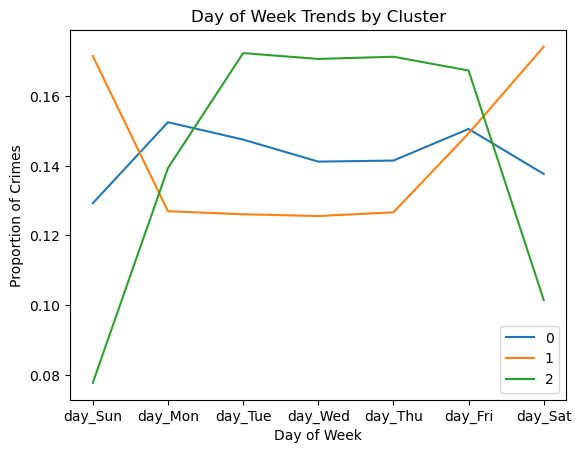

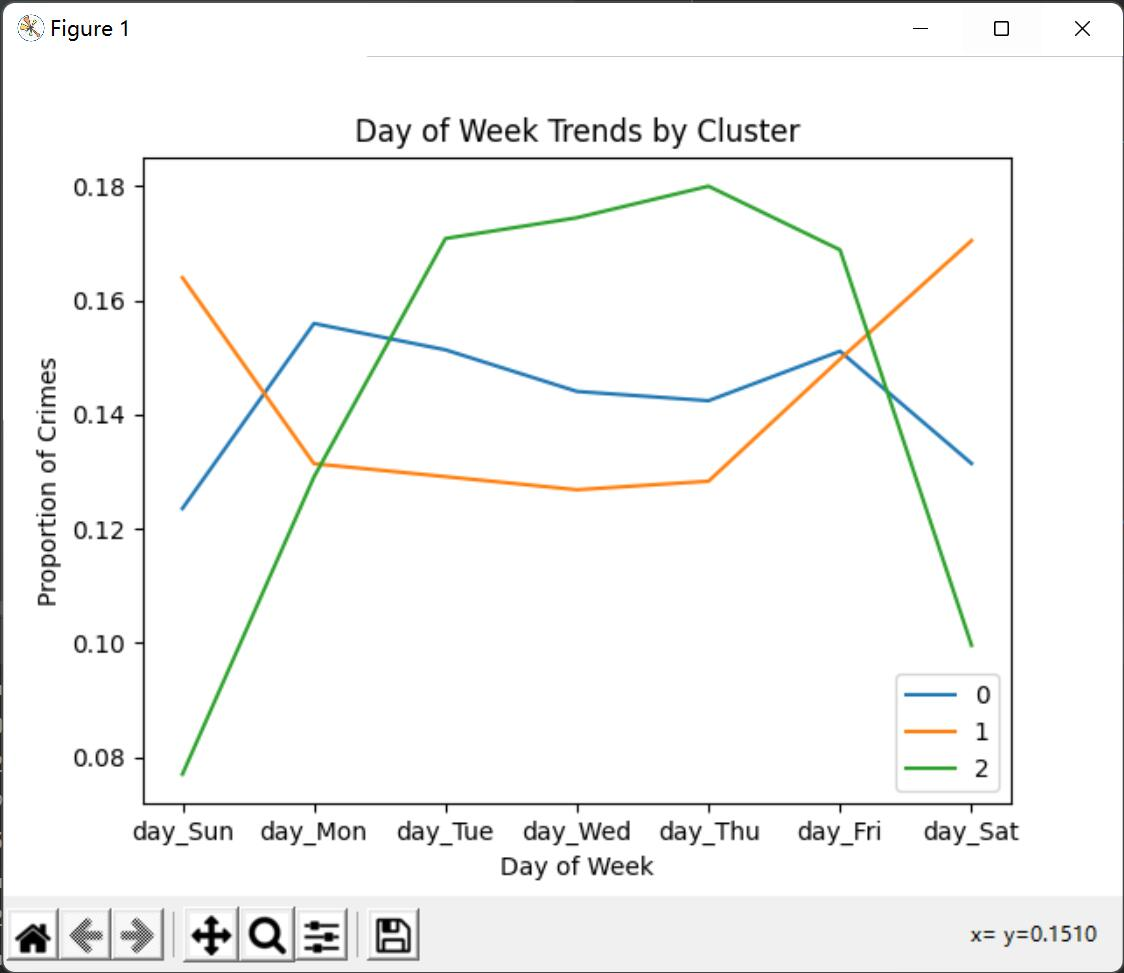

In [8]:
day_features = [f for f in data.columns if f.startswith('day_')]
X_day = data[day_features].values
kmeans_day = KMeans(n_clusters=3, random_state=0)
kmeans_day.fit(X_day)
labels_day = kmeans_day.labels_
centroids_day = kmeans_day.cluster_centers_
df_day = pd.DataFrame(centroids_day , columns=day_features)
df_day.T.plot(kind='line')
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Crimes')
plt.title('Day of Week Trends by Cluster')
plt.show()
Image('Q3_d.jpg')

d) Cluster 1: The frequency of crime decreases from Sunday to Wednesday gradually, and then increases from Wednesday to Saturday gradually.

Cluster 2: This cluster has a peak on Monday and Friday, and the frequency of crime oscillates between Monday and Friday.

Cluster 3: The frequency of crime increases from Sunday to Thursday, and decreases from Thursday to Saturday.

In [9]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [10]:
# your answers here
community_area_dict_list = []
counts = Counter(labels_hour)
for cluster_id, count in counts.items():
    indices = [i for i, label in enumerate(labels_hour) if label == cluster_id]
    data_filter = [data.iloc[i] for i in indices]
    community_area_dict = {}
    for item in data_filter:
        for column_name in item.keys():
            if column_name.startswith('community_area'):
                if column_name not in community_area_dict.keys():
                    community_area_dict[column_name] = item[column_name]
        else:
            community_area_dict[column_name] += item[column_name]
    for key in community_area_dict.keys():
        community_area_dict[key] = community_area_dict[key]/len(data_filter)
    community_area_dict_list.append(community_area_dict)
    print(community_area_dict)

particular_community = []
community_area_name = list(community_area_dict_list[0].keys())
for i in range(len(community_area_name)):
    if community_area_dict_list[0][community_area_name[i]] / community_area_dict_list[1][community_area_name[i]] > 10 or \
            community_area_dict_list[0][community_area_name[i]] / community_area_dict_list[2][community_area_name[i]] > 10 or \
            community_area_dict_list[1][community_area_name[i]] / community_area_dict_list[0][community_area_name[i]] > 10 or \
            community_area_dict_list[1][community_area_name[i]] / community_area_dict_list[2][community_area_name[i]] > 10 or \
            community_area_dict_list[2][community_area_name[i]] / community_area_dict_list[0][community_area_name[i]] > 10 or \
            community_area_dict_list[2][community_area_name[i]] / community_area_dict_list[1][community_area_name[i]] > 10:
            particular_community.append(community_area_name[i])

data2 = pd.read_csv('HW3Q3_2.csv')
particular_community_number = []
for item in particular_community:
    particular_community_number.append(item.split('_')[2])
data2_particular_community_df = data2.loc[data2["Community Area Number"].isin(particular_community_number)]
data2_not_particular_community_df = data2.loc[~data2["Community Area Number"].isin(particular_community_number)]
mean_data2_particular_community_df = data2_particular_community_df.mean()
mean_data2_not_particular_community_df = data2_not_particular_community_df.mean()
print(data2_particular_community_df.columns)
print(mean_data2_particular_community_df.values)

print(mean_data2_not_particular_community_df.values)
for i in range(len(mean_data2_particular_community_df.values)):
    if mean_data2_particular_community_df.values[i] < mean_data2_not_particular_community_df.values[i]:
        print(data2_particular_community_df.columns[i])
for i in range(len(mean_data2_particular_community_df.values)):
    if mean_data2_particular_community_df.values[i] > mean_data2_not_particular_community_df.values[i]:
        print(data2_particular_community_df.columns[i])


{'community_area_1': 8.211191304347825e-05, 'community_area_2': 0.00012316788405797102, 'community_area_3': 4.105595652173913e-05, 'community_area_4': 0.0, 'community_area_5': 0.0, 'community_area_6': 8.211191304347825e-05, 'community_area_7': 0.00016422384057971016, 'community_area_8': 4.105595652173913e-05, 'community_area_9': 0.0, 'community_area_10': 0.0, 'community_area_11': 0.0, 'community_area_12': 0.0, 'community_area_13': 4.105595652173913e-05, 'community_area_14': 0.00012316788405797102, 'community_area_15': 0.00016422384057971016, 'community_area_16': 0.00012316788405797102, 'community_area_17': 0.0002463357536231884, 'community_area_18': 4.105595652173913e-05, 'community_area_19': 0.0006979513043478262, 'community_area_20': 0.0003284476811594203, 'community_area_21': 0.0002463357536231884, 'community_area_22': 0.00041055959420289854, 'community_area_23': 0.00041055959420289854, 'community_area_24': 0.00012316788405797102, 'community_area_25': 0.0011495668550724637, 'communi

C:\Users\Z.G\AppData\Local\Temp\ipykernel_13636\716473284.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  community_area_dict_list[1][community_area_name[i]] / community_area_dict_list[0][community_area_name[i]] > 10 or \
C:\Users\Z.G\AppData\Local\Temp\ipykernel_13636\716473284.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if community_area_dict_list[0][community_area_name[i]] / community_area_dict_list[1][community_area_name[i]] > 10 or \
C:\Users\Z.G\AppData\Local\Temp\ipykernel_13636\716473284.py:25: RuntimeWarning: invalid value encountered in double_scalars
  community_area_dict_list[1][community_area_name[i]] / community_area_dict_list[0][community_area_name[i]] > 10 or \
C:\Users\Z.G\AppData\Local\Temp\ipykernel_13636\716473284.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  community_area_dict_list[2][community_area_name[i]] / community_area_dict_list[0][community_area_name[i]] > 10 or \
C:\Users\Z.G\AppData\Lo

IndexError: index 11 is out of bounds for axis 0 with size 11

According to the results, the particular community areas' average "PERCENT OF HOUSING CROWDED", "PERCENT HOUSEHOLDS BELOW POVERTY", "PERCENT AGED 16+", "UNEMPLOYED", "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA", "PER CAPITA INCOME", "PERCENT OF HOUSING UNITS VACANT" is less than the other, and the "PERCENT AGED UNDER 18 OR OVER 64" is more than the other.

In [11]:
counts = Counter(labels_hour)
for cluster_id, count in counts.items():
    indices = [i for i, label in enumerate(labels_hour) if label == cluster_id]
    crime_types = [data.iloc[i]['Category'] for i in indices]
    CategoryDict = {}
    for type in crime_types:
        if type not in list(CategoryDict.keys()):
            CategoryDict[type] = 1
        else:
            CategoryDict[type] += 1

    print(CategoryDict)

{'P1P': 11, 'P2': 34, 'P1V': 24}
{'P2': 24, 'P1P': 4}
{'P2': 22}


f) The result of the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimesis is:

{'P1P': 6, 'P2': 25, 'P1V': 22}

{'P1V': 2, 'P2': 42, 'P1P': 9}

{'P2': 13}

From the results it is clear that in cluster 1, the most crimes is P2, which is 3 more than P1V. In cluster 2, the most crimes is P2, and it's much more than the others. In cluster 3, the only crimes is P2. So result of the three groups formed by clustering hour-of-day doesn't trends correspond to the FBI’s division well.

In [12]:
days_of_week = data.iloc[:, 2:9]
scaler = StandardScaler()
days_of_week_standardized = scaler.fit_transform(days_of_week)
# K-means
kmeans_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(days_of_week_standardized)
    kmeans_scores.append(silhouette_score(days_of_week_standardized, kmeans.labels_))
best_kmeans = kmeans_scores.index(max(kmeans_scores)) + 2

# Gaussian mixture models
gmm_scores = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(days_of_week_standardized)
    gmm_scores.append(silhouette_score(days_of_week_standardized, gmm.predict(days_of_week_standardized)))
best_gmm = gmm_scores.index(max(gmm_scores)) + 2

# Bottom-up hierarchical clustering with "single link" distance metric
single_link_scores = []
for k in range(2, 11):
    single_link = AgglomerativeClustering(n_clusters=k, linkage="single")
    single_link.fit(days_of_week_standardized)
    single_link_scores.append(silhouette_score(days_of_week_standardized, single_link.labels_))
best_single_link = single_link_scores.index(max(single_link_scores)) + 2

# Bottom-up hierarchical clustering with "complete link" distance metric
complete_link_scores = []
for k in range(2, 11):
    complete_link = AgglomerativeClustering(n_clusters=k, linkage="complete")
    complete_link.fit(days_of_week_standardized)
    complete_link_scores.append(silhouette_score(days_of_week_standardized, complete_link.labels_))
best_complete_link = complete_link_scores.index(max(complete_link_scores)) + 2


# K-means
kmeans = KMeans(n_clusters=best_kmeans, random_state=42)
kmeans.fit(days_of_week_standardized)
kmeans_clusters = kmeans.labels_

cluster_sizes = np.bincount(kmeans_clusters)
print("K-mean")
print('The number of clusters:', len(cluster_sizes))
print('The number of elements in each cluster:', cluster_sizes)

# Gaussian mixture models
gmm = GaussianMixture(n_components=best_gmm, random_state=42)
gmm.fit(days_of_week_standardized)
gmm_clusters = gmm.predict(days_of_week_standardized)

cluster_sizes = np.bincount(gmm_clusters)
print("Gaussian mixture models")
print('The number of clusters:', len(cluster_sizes))
print('The number of elements in each cluster:', cluster_sizes)

# Bottom-up hierarchical clustering with "single link" distance metric
single_link = AgglomerativeClustering(n_clusters=best_single_link, linkage="single")
single_link.fit(days_of_week_standardized)
single_link_clusters = single_link.labels_

cluster_sizes = np.bincount(single_link_clusters)
print("Bottom-up hierarchical clustering with single link distance metric")
print('The number of clusters:', len(cluster_sizes))
print('The number of elements in each cluster:', cluster_sizes)

# Bottom-up hierarchical clustering with "complete link" distance metric
complete_link = AgglomerativeClustering(n_clusters=best_complete_link, linkage="complete")
complete_link.fit(days_of_week_standardized)
complete_link_clusters = complete_link.labels_


cluster_sizes = np.bincount(complete_link_clusters)
print("Bottom-up hierarchical clustering with complete link distance metric")
print('The number of clusters:', len(cluster_sizes))
print('The number of elements in each cluster:', cluster_sizes)


K-mean
The number of clusters: 3
The number of elements in each cluster: [92 25  2]
Gaussian mixture models
The number of clusters: 3
The number of elements in each cluster: [100  17   2]
Bottom-up hierarchical clustering with single link distance metric
The number of clusters: 2
The number of elements in each cluster: [  2 117]
Bottom-up hierarchical clustering with complete link distance metric
The number of clusters: 2
The number of elements in each cluster: [117   2]


g) Result:
K-mean

The number of clusters: 3

The number of elements in each cluster: [38 79 2]

Gaussian mixture models

The number of clusters: 2

The number of elements in each cluster: [30 89]

Bottom-up hierarchical clustering with single link distance metric

The number of clusters: 2

The number of elements in each cluster: [2 117]

Bottom-up hierarchical clustering with complete link distance metric

The number of clusters: 2

The number of elements in each cluster: [117 2]

From the results it is clear that the optimal number of clusters for most clustering methods is 2 and for Kmeans 3. And the number of elements in each cluster of Bottom-up hierarchical clustering with single link distance metric and complete link distance metric is the same.